In [2]:
import tensorflow as tf
import numpy as np
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# dataset used: https://www.kaggle.com/fanconic/skin-cancer-malignant-vs-benign

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp
from sklearn.metrics import roc_auc_score

import matplotlib.pyplot as plt


In [3]:
train_datagen = ImageDataGenerator(rescale=1/255)
validation_datagen = ImageDataGenerator(rescale=1/255)

train_generator = train_datagen.flow_from_directory(
        'skin_dataset/train/',
        classes = ['benign', 'malignant'],
        target_size=(200, 200),
        batch_size=329,
        # Use binary labels
        class_mode='binary')

validation_generator = validation_datagen.flow_from_directory(
        'skin_dataset/test/',
        classes = ['benign', 'malignant'],
        target_size=(200, 200),
        batch_size=82,
        # Use binary labels
        class_mode='binary',
        shuffle=False)

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation = 'relu', input_shape=(220, 220, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation ='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
# model = tf.keras.models.Sequential([tf.keras.layers.Flatten(input_shape = (200,200,3)), 
#                                     tf.keras.layers.Dense(128, activation=tf.nn.relu), 
#                                     tf.keras.layers.Dense(1, activation=tf.nn.sigmoid)])
model.summary()

Found 2637 images belonging to 2 classes.
Found 660 images belonging to 2 classes.
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 218, 218, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 109, 109, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 107, 107, 32)      4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 53, 53, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 51, 51, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 25, 25, 64)        0         
_______________________________________

In [90]:
model.compile(loss='binary_crossentropy',
optimizer='Adam', metrics='accuracy')

In [68]:
history = model.fit(train_generator, steps_per_epoch=8, epochs=10, verbose=1, validation_data=validation_generator, validation_steps=8)

Epoch 1/10
8/8 [==============================] - 41s 5s/step - loss: 0.6945 - accuracy: 0.5129 - val_loss: 0.6872 - val_accuracy: 0.5488
Epoch 2/10
8/8 [==============================] - 33s 4s/step - loss: 0.6819 - accuracy: 0.5490 - val_loss: 0.6427 - val_accuracy: 0.5534
Epoch 3/10
8/8 [==============================] - 39s 5s/step - loss: 0.6150 - accuracy: 0.6405 - val_loss: 0.5445 - val_accuracy: 0.7088
Epoch 4/10
8/8 [==============================] - 37s 4s/step - loss: 0.5337 - accuracy: 0.7397 - val_loss: 0.4979 - val_accuracy: 0.7317
Epoch 5/10
8/8 [==============================] - 40s 5s/step - loss: 0.5290 - accuracy: 0.7334 - val_loss: 0.4967 - val_accuracy: 0.7287
Epoch 6/10
8/8 [==============================] - 46s 6s/step - loss: 0.5208 - accuracy: 0.7339 - val_loss: 0.4839 - val_accuracy: 0.7424
Epoch 7/10
8/8 [==============================] - 45s 5s/step - loss: 0.4887 - accuracy: 0.7681 - val_loss: 0.4562 - val_accuracy: 0.7576
Epoch 8/10
8/8 [==================

In [91]:
model.evaluate(validation_generator)

9/9 [==============================] - 3s 312ms/step - loss: 0.6592 - accuracy: 0.6444


[0.5169552564620972, 0.7545454502105713]

In [92]:
STEP_SIZE_TEST=validation_generator.n//validation_generator.batch_size
validation_generator.reset()
preds = model.predict(validation_generator,
                      verbose=1)
fpr, tpr, _ = roc_curve(validation_generator.classes, preds)
roc_auc = auc(fpr, tpr)

9/9 [==============================] - 3s 252ms/step


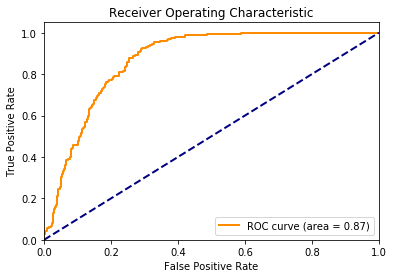

In [93]:
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

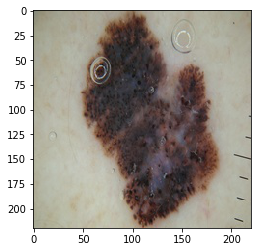

In [98]:
from tensorflow.keras.preprocessing import image

# img = image.load_img('skin_dataset/test/benign/10.jpg', target_size=(220, 220))
img = image.load_img('skin_dataset/test/malignant/3.jpg', target_size=(220, 220))

plt.imshow(img)
plt.show()


In [99]:
img_array = image.img_to_array(img)
img_batch = np.expand_dims(img_array, axis=0)
# img_preprocessed = 


In [96]:
prediction = model.predict(img_batch)

In [97]:
prediction

array([[1.]], dtype=float32)